In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'train/'
test_dir = 'test/'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 498 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/50


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 16s - 158ms/step - accuracy: 0.4900 - loss: 0.9024 - val_accuracy: 0.5000 - val_loss: 0.6529
Epoch 2/50
100/100 - 10s - 95ms/step - accuracy: 0.5020 - loss: 0.6546 - val_accuracy: 0.5000 - val_loss: 0.6503
Epoch 3/50
100/100 - 9s - 91ms/step - accuracy: 0.5000 - loss: 0.6522 - val_accuracy: 0.5020 - val_loss: 0.6523
Epoch 4/50
100/100 - 9s - 91ms/step - accuracy: 0.5542 - loss: 0.6433 - val_accuracy: 0.5420 - val_loss: 0.6503
Epoch 5/50
100/100 - 9s - 95ms/step - accuracy: 0.5241 - loss: 0.6600 - val_accuracy: 0.5000 - val_loss: 0.6500
Epoch 6/50
100/100 - 9s - 94ms/step - accuracy: 0.4819 - loss: 0.6527 - val_accuracy: 0.5000 - val_loss: 0.6525
Epoch 7/50
100/100 - 10s - 98ms/step - accuracy: 0.5000 - loss: 0.6524 - val_accuracy: 0.5000 - val_loss: 0.6524
Epoch 8/50
100/100 - 10s - 102ms/step - accuracy: 0.5000 - loss: 0.6524 - val_accuracy: 0.5000 - val_loss: 0.6524
Epoch 9/50
100/100 - 10s - 99ms/step - accuracy: 0.5000 - loss: 0.6524 - val_accuracy: 0.5000 - val_loss: 0.6

In [12]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 2s - 129ms/step - accuracy: 0.5580 - loss: 0.6920

Test accuracy: 0.5580000281333923


In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

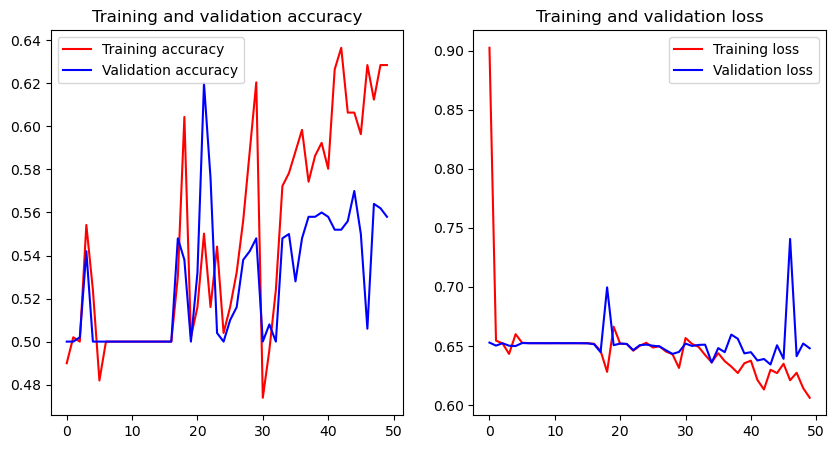

In [15]:
plot_training(history)

In [20]:
model.save("FirstSaveModel.h5")